# **CREDIT CARDHOLDERS CLUSTERING USING K-MEANS CLUSTERING**

# 1) Project Overview

A credit card is a piece of metal or plastic that is provided by a bank or financial services provider that enables cardholders to borrow money in order to make purchases. Customers to buy various services on credit without having to pay in cash at the moment of sale. Instead, a debt that must be paid off on a monthly billing cycle is accrued for the costs, giving the buyer more time to gather the necessary funds.

Notably, credit cards are today more of a platform for transactions rather than a source of credit. Many people who previously sought credit are now regular users of credit cards instead of cash. More users are using credit cards as a means of payment for convenience to make purchases as they also track and adjust expenses. 

As a result, credit card companies are investing billions in marketing to acquire new customers and grow their customer base.
Such marketing efforts are necessary not only to generate revenue, but also to attract customers to these programs.

# 1.1) Problem Statement



#1.2) Objectives
#a) Main objective
To develop a customer segmentation model for a credit card company to help define marketing strategies.

#b) Specific objectives

1. To establish the behavior of credit card users 

2. To establish whether the credit limit should be increased or not

3. To advise the credit company on a particular marketing strategy


# 1.3)Specifying the question


1.   Will a marketing strategy be defined from the customer segmentation model?

# 1.4) Defining the metric of success

* Perform Exploratory Data Analysis on the dataset.

* Project will be considered successful if .

* Achieve a Silhouette index of 1




#1.5) Understanding the question

This dataset is named Credit Card Dataset. The dataset contain records under 18 attributes:

Below are the various variables in our dataset;

1. **CUST_ID** : Identification of Credit Card holder 
2. **BALANCE**  :	Balance amount left in their account to make purchases 
3. **BALANCE_FREQUENCY** : How frequently the Balance is updated, score    between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. **PURCHASES**:	Amount of purchases made from account
5. **ONE_OFF_PURCHASES** : Maximum purchase amount done in one-go
6.	**INSTALLMENT_PURCHASES** :	Amount of purchase done in installment
7.	**CASH_ADVANCE** :  Cash in advance given by the user
8.	**PURCHASES_FREQUENCY** :	How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9.  **ONE_OFF_PURCHASES_FREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. **PURCHASES_INSTALLMENTS_FREQUENCY** :	How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11.	**CASH_ADVANCE_FREQUENCY** : How frequently the cash in advance being paid	
12. **CASH_ADVANCE_TRX** : Number of Transactions made with "Cash in Advanced"
13. **PURCHASES_TRX** :	Number of purchase transactions made
14. **CREDIT_LIMIT** : Limit of Credit Card for user
15. **PAYMENTS** : Amount of Payment done by user
16. **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
17. **PRC_FULL_PAYMENT** : Percent of full payment paid by user
18. **TENURE** : Tenure of credit card service for user



#1.6) Experimental Design Taken

1. Loading the relevant libraries
2. Reading and previewing dataset
3. Tidying the data
4. Exploratory data analysis
5. Data pre-processing
6. Implementing the solution
7. Challenging the solution 

# 1.7) Data Relevance
The dataset is relevant for this analysis. It summarizes the usage behavior of  8,950 active credit card holders. The dataset provides a complete overview on the information required to segment customers and define a marketing strategy .

The dataset was extracted from [Kaggle](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

# 2) Reading the data


In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA

In [ ]:
#Loading dataset
df=pd.read_csv('/content/CC GENERAL.csv')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# 3) Understanding the data

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


# 4) Tidying the Dataset


a) ###Removing the 'CUST_ID' Columin

In [ ]:
#Removing the 'CUST_ID' Columin
df.drop("CUST_ID",axis=1,inplace=True)


In [ ]:
#Previewing dataset
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.shape

(8950, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


##Checking for missing values

In [ ]:
#Finding missing values
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## Filling the missing values

In [ ]:
#Filling null values
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(),inplace=True)
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(),inplace=True)

In [ ]:
#Checking for null values
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

##Checking for outliers

In [ ]:
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

BALANCE yes
BALANCE_FREQUENCY yes
PURCHASES yes
ONEOFF_PURCHASES yes
INSTALLMENTS_PURCHASES yes
CASH_ADVANCE yes
PURCHASES_FREQUENCY no
ONEOFF_PURCHASES_FREQUENCY yes
PURCHASES_INSTALLMENTS_FREQUENCY no
CASH_ADVANCE_FREQUENCY yes
CASH_ADVANCE_TRX yes
PURCHASES_TRX yes
CREDIT_LIMIT yes
PAYMENTS yes
MINIMUM_PAYMENTS yes
PRC_FULL_PAYMENT yes
TENURE yes


its observed that most of the variables have outliers

##Plots to check for outliers per variable

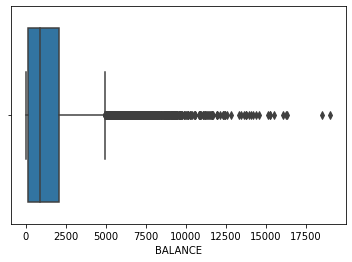

In [ ]:
sns.boxplot(x=df["BALANCE"])

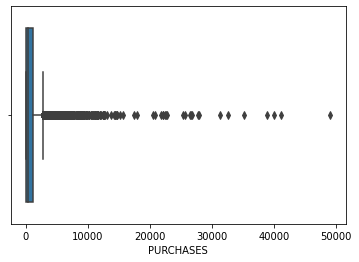

In [ ]:
sns.boxplot(x=df["PURCHASES"])

In [ ]:

df.iloc[:,:-1]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [ ]:
#Removing Outliers
for i in df.iloc[:,:-1]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df.loc[df[i] > up_lim,i] = up_lim
    df.loc[df[i] < low_lim,i] = low_lim

In [ ]:
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

BALANCE no
BALANCE_FREQUENCY no
PURCHASES no
ONEOFF_PURCHASES no
INSTALLMENTS_PURCHASES no
CASH_ADVANCE no
PURCHASES_FREQUENCY no
ONEOFF_PURCHASES_FREQUENCY no
PURCHASES_INSTALLMENTS_FREQUENCY no
CASH_ADVANCE_FREQUENCY no
CASH_ADVANCE_TRX no
PURCHASES_TRX no
CREDIT_LIMIT no
PAYMENTS no
MINIMUM_PAYMENTS no
PRC_FULL_PAYMENT no
TENURE yes


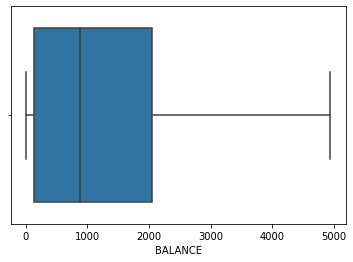

In [ ]:
sns.boxplot(x=df["BALANCE"])

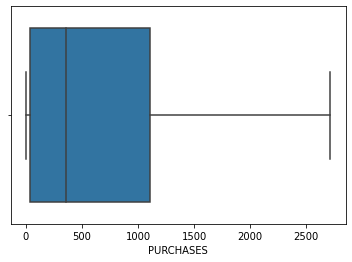

In [ ]:
sns.boxplot(x=df["PURCHASES"])

The outliers have been removed, the values ​​below the lower limit have been replaced with the lower limit, and the values ​​above the upper limit replaced with the upper limit. The outliers in TENURE variable were not removed.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1390.508973,1537.538479,0.000000,128.281915,873.385231,2054.140036,4942.927215
BALANCE_FREQUENCY,8950.0,0.931587,0.110984,0.722223,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.0,737.149330,879.534788,0.000000,39.635000,361.280000,1110.130000,2715.872500
ONEOFF_PURCHASES,8950.0,354.358139,511.823289,0.000000,0.000000,38.000000,577.405000,1443.512500
INSTALLMENTS_PURCHASES,8950.0,295.546214,396.181546,0.000000,0.000000,89.000000,468.637500,1171.593750
CASH_ADVANCE,8950.0,672.468924,998.514970,0.000000,0.000000,0.000000,1113.821139,2784.552848
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.184773,0.255668,0.000000,0.000000,0.083333,0.300000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.126061,0.172676,0.000000,0.000000,0.000000,0.222222,0.555555


# 5) Exploratory Data Analysis


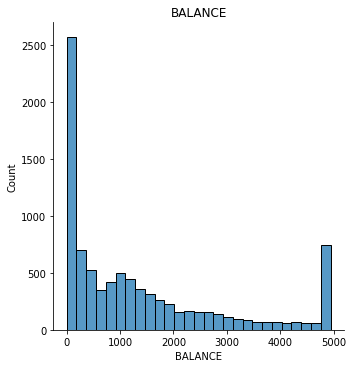

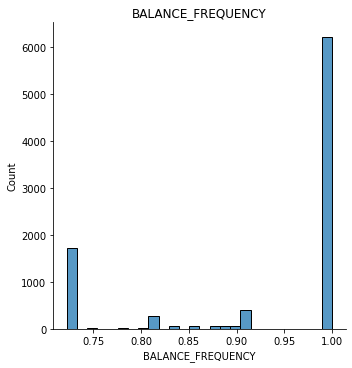

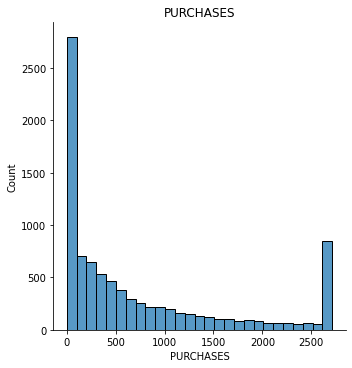

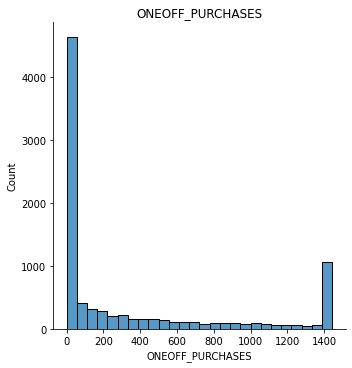

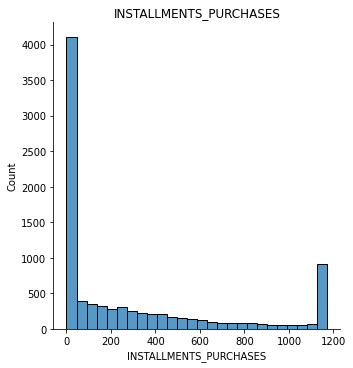

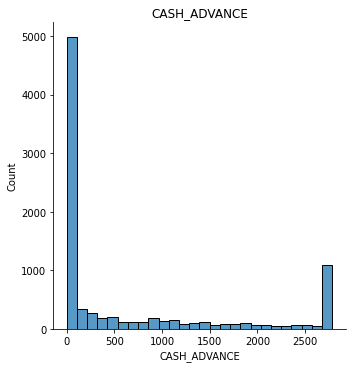

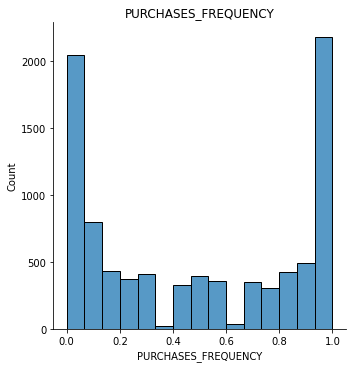

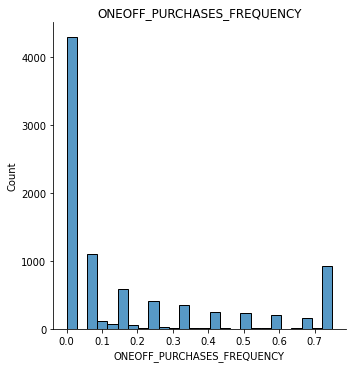

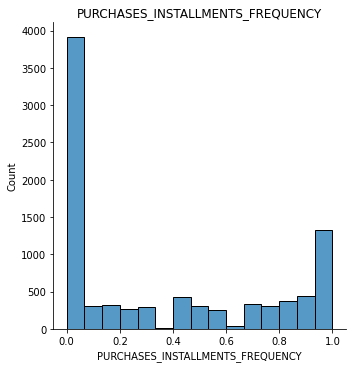

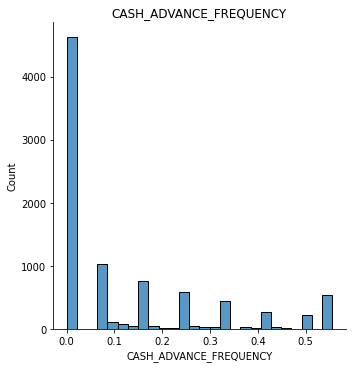

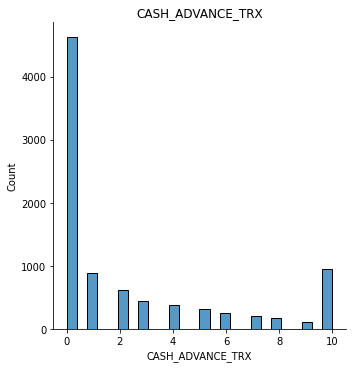

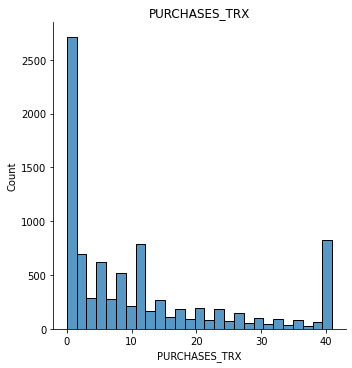

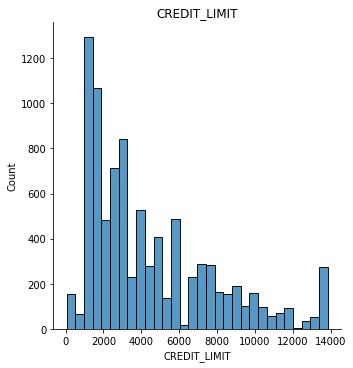

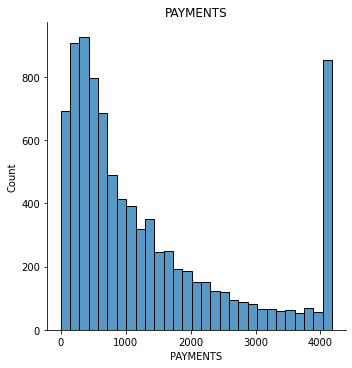

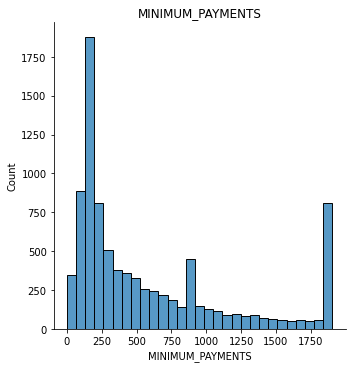

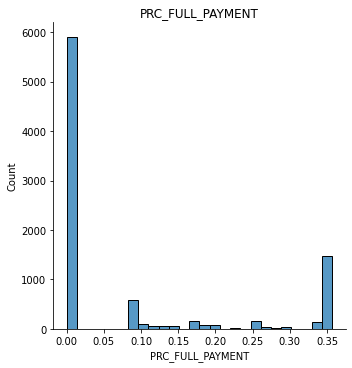

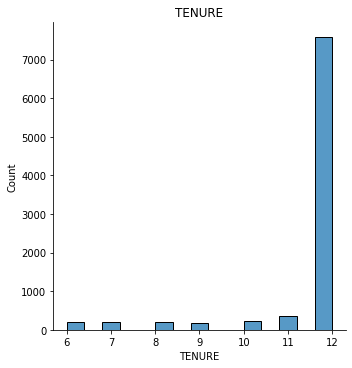

In [ ]:
for i in df:
    sns.displot(x = i, data = df)
    plt.title(i)

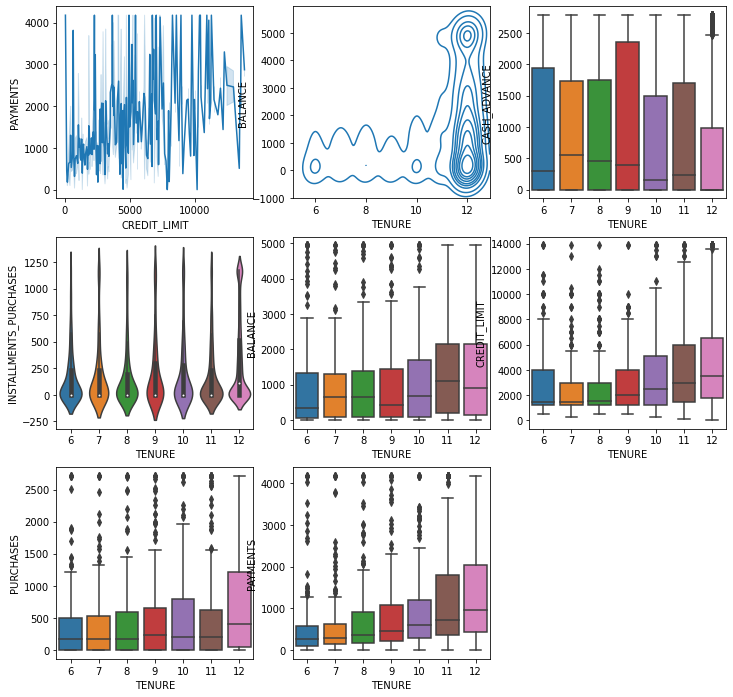

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.lineplot(x ='CREDIT_LIMIT',y ='PAYMENTS', data = df)
plt.subplot(3,3,2)
sns.kdeplot(x = 'TENURE', y = 'BALANCE', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'TENURE', y = 'CASH_ADVANCE', data = df)
plt.subplot(3,3,4)
sns.violinplot(x = 'TENURE', y = 'INSTALLMENTS_PURCHASES', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'TENURE', y = 'BALANCE', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'TENURE', y = 'CREDIT_LIMIT', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'TENURE', y = 'PURCHASES', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'TENURE', y = 'PAYMENTS', data = df)
plt.show()

In [ ]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.403457,0.095805,0.124043,0.009457,0.557393,-0.108922,0.081477,-0.096473,0.497089,0.500925,0.057123,0.488516,0.350558,0.802934,-0.419972,0.075417
BALANCE_FREQUENCY,0.403457,1.000000,0.184972,0.149539,0.161057,0.102849,0.222217,0.199187,0.180675,0.186646,0.175467,0.248062,0.107968,0.133318,0.306531,-0.183459,0.186697
PURCHASES,0.095805,0.184972,1.000000,0.830603,0.706135,-0.177093,0.631891,0.683525,0.488919,-0.207612,-0.190023,0.808546,0.330410,0.501153,0.071449,0.212936,0.120207
ONEOFF_PURCHASES,0.124043,0.149539,0.830603,1.000000,0.286764,-0.116870,0.408137,0.821933,0.152872,-0.127137,-0.117956,0.622341,0.321476,0.422124,0.045047,0.091038,0.087002
INSTALLMENTS_PURCHASES,0.009457,0.161057,0.706135,0.286764,1.000000,-0.185467,0.688315,0.249382,0.780193,-0.220042,-0.200208,0.725475,0.191926,0.324137,0.052574,0.254259,0.111298
CASH_ADVANCE,0.557393,0.102849,-0.177093,-0.116870,-0.185467,1.000000,-0.319499,-0.134830,-0.264589,0.769767,0.801425,-0.203801,0.258418,0.331303,0.420883,-0.227197,-0.099027
PURCHASES_FREQUENCY,-0.108922,0.222217,0.631891,0.408137,0.688315,-0.319499,1.000000,0.499498,0.862934,-0.336823,-0.315382,0.795194,0.118192,0.163930,-0.052645,0.316356,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.081477,0.199187,0.683525,0.821933,0.249382,-0.134830,0.499498,1.000000,0.143475,-0.121845,-0.118664,0.650300,0.293008,0.336919,0.007255,0.123273,0.077257
PURCHASES_INSTALLMENTS_FREQUENCY,-0.096473,0.180675,0.488919,0.152872,0.780193,-0.264589,0.862934,0.143475,1.000000,-0.285161,-0.264110,0.700146,0.057750,0.120975,-0.023301,0.266671,0.073275
CASH_ADVANCE_FREQUENCY,0.497089,0.186646,-0.207612,-0.127137,-0.220042,0.769767,-0.336823,-0.121845,-0.285161,1.000000,0.930204,-0.217631,0.128309,0.213939,0.360433,-0.268737,-0.127145


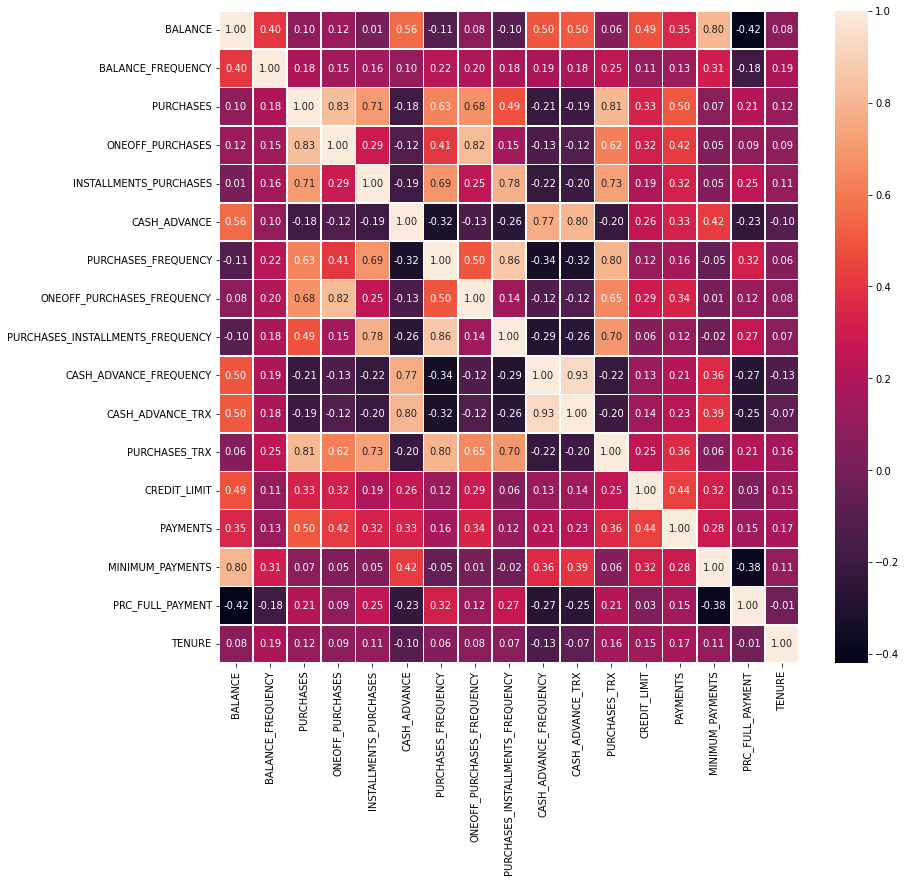

In [ ]:
plt.figure(figsize=(13,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,fmt=".2f")
plt.show()

It can be seen that there is a strong correlation between some variables from the data, such as between PURCHASES and ONEOFF_PURCHASES, PURCHASES_FREQUENCY and ONEOFF_PURCHASES_FREQUENCY, etc. This result indicates that this dataset has multicollinearity and might not be suitable for various classification algorithms that have non-multicollinearity as their assumption.

# 6) Implementing the Solution


The Elbow Method

In [ ]:
#finding optimum number of clusters using elbow method;

df1=df
score=[]
k=range(1,25)

for i in k:
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(df1)
    score.append(kmeans.inertia_)

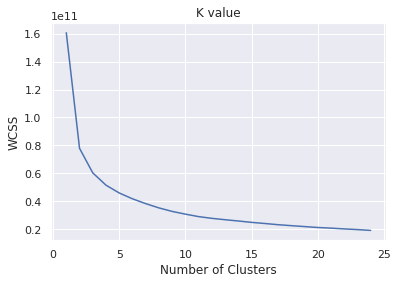

In [ ]:
#Ploting of clusters

sns.set()
plt.plot(range(1,25), score)
plt.title('K value')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Installing the yellowbick package

!pip install yellowbrick


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing kelbow visualizer library
from yellowbrick.cluster import KElbowVisualizer


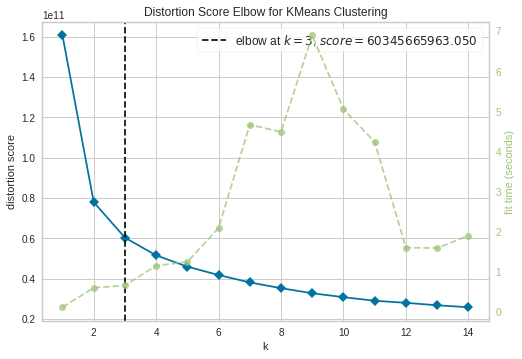

In [ ]:
#Visualizing using elbow visualizer
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,15))   
visualizer.fit(df1)
visualizer.poof()
plt.show()

Observation:
We can see that the optimum value of k=3 

Training the k-Means Clustering Model

In [ ]:
#Training the k-Means Clustering Model

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=15)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(df1)

#previewing the clusters
print(Y)

[0 2 2 ... 0 0 0]


Observation:
We have 3 clusters that is 0,1, 2

In [ ]:
#Segementing our dataset into the 3 clusters

df_kmeans = df1.copy()
df_kmeans['Segment'] = kmeans.labels_
df_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Segment
0,40.900749,0.818182,95.40,0.0000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.0000,0.00,2784.552848,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.1700,0.00,0.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.722223,1499.00,1443.5125,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.0000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.0000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.357143,6,0
8946,19.183215,1.000000,300.00,0.0000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.0000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.0000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [ ]:
#Analysis of the  characteristics of each cluster using mean
df_user_analysis = df_kmeans.groupby('Segment').mean().round(3)
df_user_analysis

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Segment,,,,,,,,,,,,,,,,,
0,760.270,0.918,484.543,213.451,231.492,435.824,0.449,0.121,0.346,0.103,1.890,8.781,2078.518,861.515,443.543,0.086,11.358
1,3115.632,0.960,1245.752,642.448,431.346,1264.072,0.564,0.308,0.408,0.190,3.712,17.290,11158.772,2504.231,1065.851,0.081,11.741
2,1872.451,0.947,1012.654,506.063,362.330,878.716,0.539,0.257,0.381,0.143,2.769,14.750,6059.728,1795.841,681.037,0.093,11.735




*   Cluster 1: Have less balance and low amount of purchases and have a chance of 8.6% of paying the full amount
*   Cluster 2: Have the highest balance in the card and the highest number of purchases, chances of repaying the full amount is 8.1%

*  Cluster 3: Have a moderate balance and a high amount on purchases, chances of paying full amount is 9.4%








In [ ]:
df_kmeans.groupby("Segment").count()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Segment,,,,,,,,,,,,,,,,,
0,5185,5185,5185,5185,5185,5185,5185,5185,5185,5185,5185,5185,5185,5185,5185,5185,5185
1,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169
2,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596


Observation:
1.   Cluster 1: Has 5185 credit card holders
2.   Cluster 2: Has 1169 credit cardholders
3.   Cluster 3: Has 2596 credit Card Holders










#Applying Principal Componet Analysis







As we observed from the correlation matrix, there's multicollinearity in our data hence Principal Component Analysis will be performed on this data to produce non-multicollinearity data, while also reducing the dimension of the data and retaining as much as information possible. The result of this analysis can be utilized further for classification purpose with lower computation.

In [ ]:
#identifying pca componets
from sklearn.decomposition import PCA

df2=df
pca = PCA()
pca.fit(df2)

pca.explained_variance_ratio_

array([7.11680803e-01, 1.26391440e-01, 8.51241308e-02, 4.38197609e-02,
       1.89440657e-02, 7.95533479e-03, 5.28700823e-03, 7.94464454e-04,
       2.67210039e-06, 2.21944632e-07, 9.07314277e-08, 4.32662294e-09,
       1.40292725e-09, 6.90290730e-10, 4.62093206e-10, 2.92339411e-10,
       2.01061735e-10])

Text(0, 0.5, 'Cumulative Explained Variance')

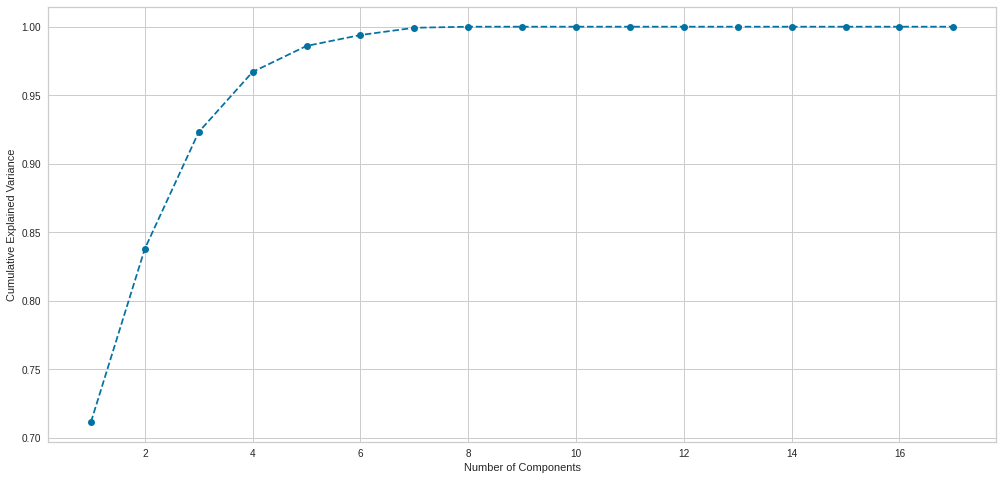

In [ ]:
plt.figure(figsize=(17, 8))
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Observation:

Based from the above results, if we want to retain a variance of 96%  information of the data set, using 7 dimensions to do so is enough. This means that we can reduce the number of dimensions on our data set from 17 to 7 dimensions.

In [ ]:
#PCA components
pca = PCA(n_components=7)
pca.fit(df2)

df_pca_components = pd.DataFrame(
    data=pca.components_.round(4),
    columns=df2.columns.values,
    index=['component 1', 'component 2', 'component 3','component 4', 'component 5', 'component 6','component 7'])

df_pca_components

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
component 1,0.2546,0.0,0.0891,0.0501,0.0231,0.0943,0.0000,0.0000,0.0000,0.0000,0.0002,0.0010,0.9363,0.1852,0.0657,-0.0,0.0001
component 2,0.7687,0.0,-0.1170,-0.0530,-0.0482,0.4467,-0.0001,-0.0000,-0.0001,0.0001,0.0014,-0.0017,-0.2948,0.1910,0.2597,-0.0,-0.0000
component 3,-0.1121,0.0,0.5100,0.2420,0.1636,-0.0685,0.0001,0.0001,0.0001,-0.0000,-0.0003,0.0059,-0.1807,0.7774,-0.0177,0.0,0.0001
component 4,-0.4502,-0.0,-0.4377,-0.2231,-0.1457,0.5939,-0.0002,-0.0001,-0.0001,0.0001,0.0014,-0.0061,0.0563,0.3838,-0.1774,0.0,-0.0001
component 5,-0.1296,0.0,0.5057,0.3081,0.1207,0.6532,0.0001,0.0001,0.0001,0.0001,0.0015,0.0056,-0.0065,-0.4186,-0.1265,0.0,-0.0004
component 6,-0.1144,0.0,0.1258,-0.6065,0.7017,0.0722,0.0003,-0.0002,0.0006,-0.0000,-0.0001,0.0069,0.0126,-0.0414,0.3221,0.0,0.0001
component 7,-0.3150,-0.0,-0.0127,0.2247,-0.2658,0.0469,-0.0001,0.0001,-0.0002,-0.0000,0.0002,-0.0022,0.0193,-0.0224,0.8811,-0.0,0.0002


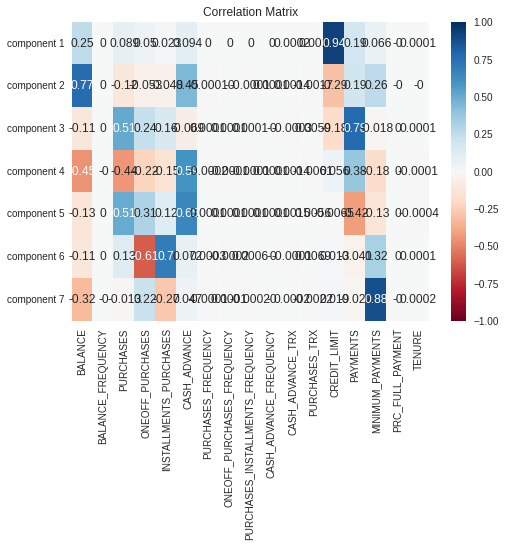

In [ ]:
#Correlation matrix of the npca components
s = sns.heatmap(
    df_pca_components,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
    annot=True
)
plt.title('Correlation Matrix')
plt.show()


Observation:

 

1.   Component 1 has a positive correlation with Balance ,credit limit and payments
2.   Component 2: has a positive corrlation with balance, cash advance and minimum payments
3. Component 3: has a positve correlation with purchases, one off purchases, payments and installment purchases
4.   Component 4: has a psotive correlatio with  Cash advance, payments and credit limit
5.  Component 5: Has a positve correlation with purchases, one-off purchases, installment purchases, cash advance and purchases_ frequency 
6.   Component 6: has a postive correlation with purchases, oneoff purchases, installments_purchases and cash advance 
7.   Component 7: has a positive correlation with minumu payments, one-off payment and csh advance













In [ ]:
#implementing using KMEANS clustering with PCA
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pca.fit(df_pca_components)



KMeans(n_clusters=3, random_state=42)

In [ ]:
#Segmenting the components
df_kmeans = df2.copy()
df_kmeans['Segment'] = kmeans.labels_
df_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Segment
0,40.900749,0.818182,95.40,0.0000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.0000,0.00,2784.552848,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.1700,0.00,0.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.722223,1499.00,1443.5125,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.0000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.0000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.357143,6,0
8946,19.183215,1.000000,300.00,0.0000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.0000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.0000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [ ]:
#User Anaysis of the different clusters
df_segm_pca_analysis = df_kmeans.groupby(['Segment']).mean().round(4)
df_segm_pca_analysis

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Segment,,,,,,,,,,,,,,,,,
0,760.2696,0.9176,484.5426,213.4513,231.4920,435.8243,0.4493,0.1209,0.3463,0.1032,1.8905,8.7809,2078.5178,861.5148,443.5425,0.0856,11.3580
1,3115.6319,0.9598,1245.7519,642.4481,431.3456,1264.0725,0.5635,0.3084,0.4082,0.1903,3.7117,17.2900,11158.7721,2504.2313,1065.8506,0.0813,11.7408
2,1872.4513,0.9468,1012.6537,506.0626,362.3304,878.7163,0.5394,0.2568,0.3810,0.1428,2.7689,14.7504,6059.7277,1795.8407,681.0367,0.0932,11.7350


Observations:

Based on the data used in this report and the K_Means Clustering process that has been done, we can conclude that:



1. Cluster 1: Customers with lowest amount of all purchases, not much withdrawals, indicates not many transactions of the credit card compared to the other clusters.
2. Cluster 2: Customers with lowest amount of withdrawal and frequency, however, have the highest amount of all purchases. They have the longest tenure and highest percent of full payments paid, indicating that they are aware of their credits.
3.  Cluster 3: Customers with high amount of balance, high cash advance and high credit limit. Their balance also seemed to be updated frequently, indicates many transactions of the credit card. The customers of this cluster also have lowest amount of minimum payments, highest percent of full payments paid, indicating higher loans amount and often like to withdraw a lot of money from the credit card.





Recommendations:

Based on the clusters that have been produced, a few business suggestions can be made to profit the industry, such as:



1.   Cluster 1 have the lowest amount of purchases compared with the other clusters, hence if there are offers such as reward programs, discounts using credit card, they could be the best target.
2.   Cluster 2 & 3 has the highest amount of payments compared with the other clusters, indicating how aware they are of their credits. Hence, if there are offers such as loyalty points, they could be the best target.










In [ ]:
from factoextra import fviz_pca_biplot

# Visualize the PCA biplot
fviz_pca_biplot(pca, 
                habillage = labels, 
                addEllipses = True, 
                geom_ind = "point", 
                palette = "Accent", 
                show_legend = True)

plt.show()